# Preprocessing

* https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")

X_test = pd.read_csv("X_test.csv")
Y_test = pd.read_csv("Y_test.csv")

In [3]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


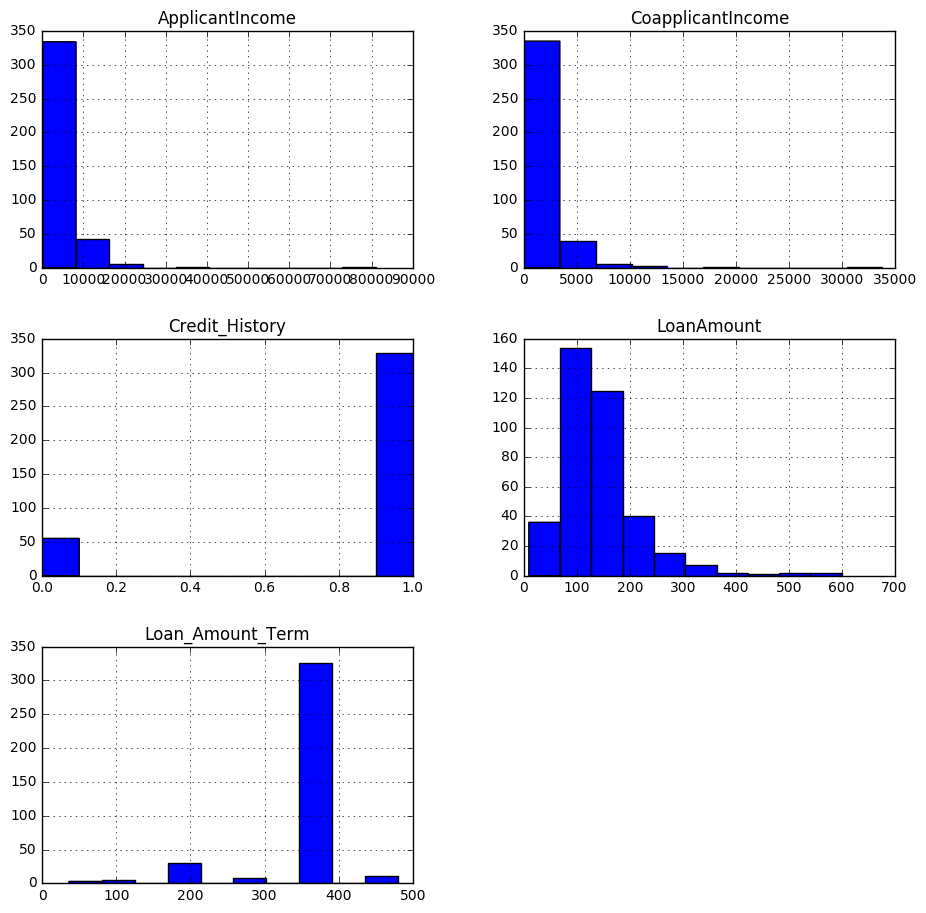

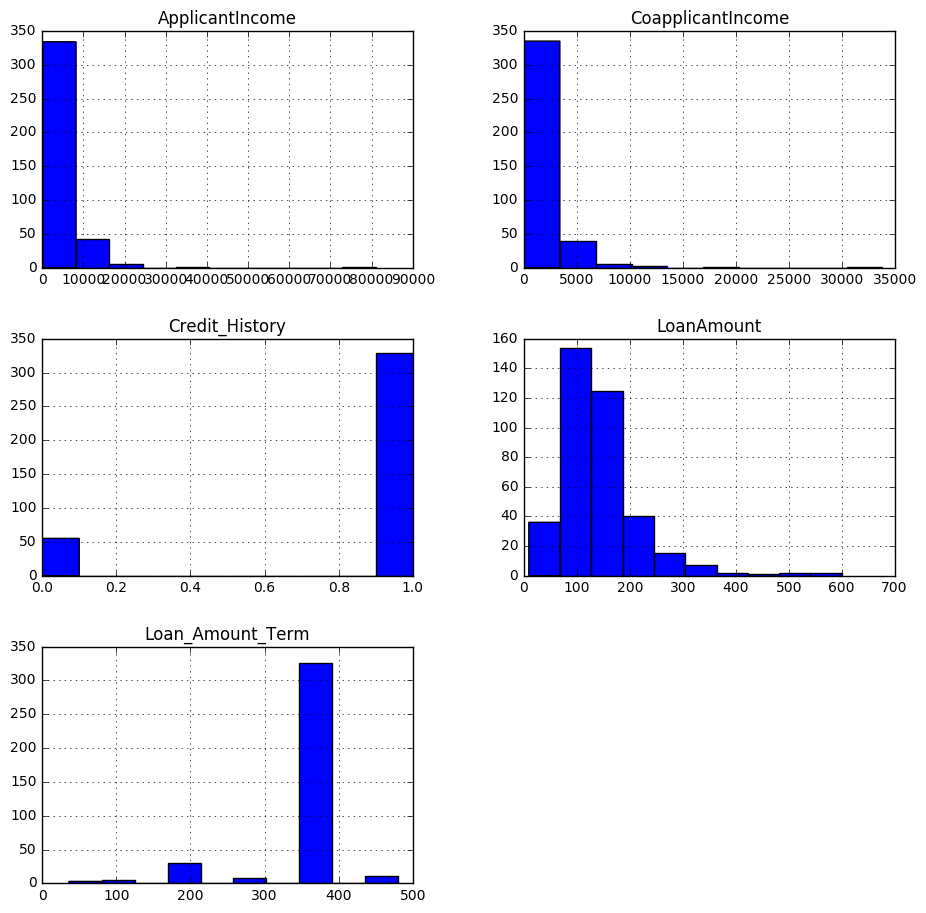

In [7]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])
plt.show()

## MinMaxScaler

In [8]:
# Initializing and Fitting a k-NN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 
                   'Loan_Amount_Term', 'Credit_History']],Y_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome', 'CoapplicantIncome',
                             'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.61458333333333337

In [9]:
Y_train.Target.value_counts()/Y_train.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [10]:
Y_test.Target.value_counts()/Y_test.Target.count()

Y    0.635417
N    0.364583
Name: Target, dtype: float64

In [11]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])


# Standardzation

In [12]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
    # creating an exhaustive list of all possible categorical values
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(X_train[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(X_train.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    # fitting One Hot Encoding on test data
    temp = enc.transform(X_test[[col]])
    # changing it into data frame and adding column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
    # Setting the index for proper concatenation
    temp=temp.set_index(X_test.index.values)
    # adding the new One Hot Encoded varibales to test data frame
    X_test_1=pd.concat([X_test_1,temp],axis=1)

ValueError: could not convert string to float: 'Male'